In [1]:
## adapted from 
## https://github.com/yhuag/neural-network-lab/blob/master/Feedforward%20Neural%20Network.ipynb

import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import torch.utils.data as utils
from mpl_toolkits.mplot3d import Axes3D


In [2]:
# input_size = 12        # The image size = 28 x 28 = 784
# hidden_size = 500      # The number of nodes at the hidden layer
# num_classes = 2        # The number of output classes. In this case, from 0 to 9
# num_epochs = 5         # The number of times entire dataset is trained
# batch_size = 100       # The size of input data took for one iteration
# learning_rate = 0.001  # The speed of convergence


In [3]:
# Import Dataset
qcd_raw = pd.read_csv('../HiggsReconstruction/EventPlotting/qcd_outputDataForLearning.csv')
hh_raw = pd.read_csv('../HiggsReconstruction/EventPlotting/dihiggs_outputDataForLearning.csv')

print(len(qcd_raw), "rows of qcd data")
print(len(hh_raw), "rows of dihiggs data")
qcd_raw.head()

hh_raw.head()


1703 rows of qcd data
4605 rows of dihiggs data


,hh_mass,h1_mass,h2_mass,hh_pt,h1_pt,h2_pt,"deltaR(h1, h2)",deltaR(h1 jets),deltaR(h2 jets),"deltaPhi(h1, h2)",...,jet3_pz,jet4_pz,jet1_energy,jet2_energy,jet3_energy,jet4_energy,jet1_btag,jet2_btag,jet3_btag,jet4_btag
0,357.863363,148.291836,158.296646,159.989384,146.375635,44.305395,2.173180,2.399412,3.045172,-1.399745,...,-68.743157,-193.100557,213.758220,33.357314,109.728774,199.436112,1,1,1,1
1,398.807335,96.553640,58.554601,79.057467,159.554932,127.973055,3.027527,1.343736,1.118390,-2.628797,...,159.218959,26.364061,145.013069,49.268918,196.843044,36.066384,1,1,1,1
2,517.175766,110.271880,130.164227,345.167743,311.858661,195.516589,1.993485,0.697377,1.152385,-1.705208,...,119.529521,120.680121,236.958103,93.822710,169.676742,166.284766,1,1,1,1
3,703.807212,179.640526,166.136193,218.966737,339.262375,272.492484,2.518050,2.053376,2.090557,-2.441515,...,-240.496539,-109.657444,927.030920,36.379140,362.014352,111.759012,1,1,1,1
4,258.159408,36.588619,25.013392,95.051098,138.921709,46.393858,3.514808,0.549648,0.997364,-2.869764,...,-129.592083,-71.691360,109.019537,36.042242,133.506407,74.563495,1,1,1,1


In [4]:


# Make higgs and qcd sets from raw data
# hh_all = hh_raw[['h1_mass', 'h2_mass', 'deltaR(h1 jets)', 'deltaR(h2 jets)', 'jet1_pz', 'jet2_pz', 'jet3_pz', 'jet4_pz', 'jet1_energy', 'jet2_energy', 'jet3_energy', 'jet4_energy']]
# qcd = qcd_raw[['h1_mass', 'h2_mass', 'deltaR(h1 jets)', 'deltaR(h2 jets)', 'jet1_pz', 'jet2_pz', 'jet3_pz', 'jet4_pz', 'jet1_energy', 'jet2_energy', 'jet3_energy', 'jet4_energy']]

# hh_all = hh_raw[['hh_mass', 'h1_mass', 'h2_mass', 'deltaR(h1 jets)', 'deltaR(h2 jets)']]
# qcd = qcd_raw[['hh_mass', 'h1_mass', 'h2_mass', 'deltaR(h1 jets)', 'deltaR(h2 jets)']]

#same as ruhi
# hh_all = hh_raw[['hh_mass', 'h1_mass', 'h2_mass', 'deltaR(h1 jets)', 'deltaR(h2 jets)', 'deltaPhi(h1, h2)', 'deltaPhi(h1 jets)', 'deltaPhi(h2 jets)']]
# qcd = qcd_raw[['hh_mass', 'h1_mass', 'h2_mass', 'deltaR(h1 jets)', 'deltaR(h2 jets)', 'deltaPhi(h1, h2)', 'deltaPhi(h1 jets)', 'deltaPhi(h2 jets)']]

hh_all = hh_raw[['hh_mass', 'h1_mass', 'h2_mass', 'deltaR(h1, h2)', 'deltaR(h1 jets)', 'deltaR(h2 jets)', 'deltaPhi(h1, h2)', 'deltaPhi(h1 jets)', 'deltaPhi(h2 jets)']]
qcd = qcd_raw[['hh_mass', 'h1_mass', 'h2_mass', 'deltaR(h1, h2)', 'deltaR(h1 jets)', 'deltaR(h2 jets)', 'deltaPhi(h1, h2)', 'deltaPhi(h1 jets)', 'deltaPhi(h2 jets)']]

# hh_all = hh_raw[['deltaR(h1 jets)', 'deltaR(h2 jets)']]
# qcd = qcd_raw[['deltaR(h1 jets)', 'deltaR(h2 jets)']]

# hh_all = hh_raw[['hh_mass', 'h1_mass', 'h2_mass']]
# qcd = qcd_raw[['hh_mass', 'h1_mass', 'h2_mass']]

n_factors = np.shape(hh_all)[1]
print(n_factors)

9


In [ ]:
hh_all = np.array(hh_all)
qcd = np.array(qcd)

# add labels to di-higgs
hh_all=hh_all[:,:n_factors]
# # print(hh[0:3])
hh_labels= np.zeros((len(hh_all),1))
hh_labels = hh_labels+1
#a = hh[:len(hh)]
# print(a.shape)
# hh_all[:,0] = np.random.rand(np.shape(hh_all)[0])
hh_all = np.append(hh_all, hh_labels, axis=1)
hh_all = np.append(hh_all, 1-hh_labels, axis=1)## hh qcd labels 


# print(hh.shape)
# print(hh[0:3])

# add labels to qcd
qcd=qcd[:,:n_factors]
# print(hh[0:3])
qcd_labels= np.zeros((len(qcd),1))
#a = hh[:len(hh)]
# print(a.shape)
# qcd hh labels 
# qcd[:, 0] = -1 * np.random.rand(np.shape(qcd)[0])
qcd = np.append(qcd, qcd_labels, axis=1) 
qcd = np.append(qcd, 1-qcd_labels, axis=1)# qcd qcd labels


# use this for dummy variables
# hh_all[:,0] = np.random.rand(np.shape(hh_all)[0])
# hh_all[:,1] = np.random.rand(np.shape(hh_all)[0])
# qcd[:, 0] = -1 * np.random.rand(np.shape(qcd)[0]) # 0% overlap
# qcd[:, 1] = -1 * np.random.rand(np.shape(qcd)[0])
# qcd[:, 0] = hh_all[:len(qcd),0] # 100% overlap
# qcd[:, 1] = hh_all[:len(qcd),1]
# qcd[:, 0] = hh_all[:len(qcd),0] -.0625 # n% overlap
# qcd[:, 1] = hh_all[:len(qcd),1] -.0625


# select a quarter of hh events so that the set is half and half
# we shuffle the list first to take a random 1/4. this means we have a different dataset every time
# np.random.seed(0)
# np.random.shuffle(hh_all) 
hh = hh_all[0:len(qcd)]
# print(hh[:4])
# print(qcd[:4])

all_data = np.append(hh,qcd, axis=0) 
all_data[:n_factors,:]

np.random.seed(0)
# for i in range (4): # shuffle 4 times
#     np.random.shuffle(all_data) 
print(all_data[:4])
all_labels = all_data[:,n_factors:]
# for testing model resilience
# for i in range(2):
#     np.random.shuffle(all_labels)
all_data = all_data[:,:n_factors]
# print(all_data[:4])
print(all_labels[:4])
# print(test_data)
# print(len(all_data))
# print(all_labels)

input_size = n_factors       
hidden_size = 500      # The number of nodes at the hidden layer
num_classes = all_labels.shape[1]       # The number of output classes. In this case, from 0 to 9
num_epochs = 5         # The number of times entire dataset is trained
batch_size = 100       # The size of input data took for one iteration
learning_rate = 0.001  # The speed of convergence

[[ 3.57863363e+02  1.48291836e+02  1.58296646e+02  2.17318000e+00
   2.39941158e+00  3.04517197e+00 -1.39974523e+00  2.26137894e+00
  -2.73688633e+00  1.00000000e+00  0.00000000e+00]
 [ 3.98807335e+02  9.65536398e+01  5.85546013e+01  3.02752724e+00
   1.34373550e+00  1.11838980e+00 -2.62879683e+00  1.20060802e+00
   1.10447589e+00  1.00000000e+00  0.00000000e+00]
 [ 5.17175766e+02  1.10271880e+02  1.30164227e+02  1.99348524e+00
   6.97377344e-01  1.15238492e+00 -1.70520791e+00 -6.44060135e-01
   1.15179259e+00  1.00000000e+00  0.00000000e+00]
 [ 7.03807212e+02  1.79640526e+02  1.66136193e+02  2.51804950e+00
   2.05337635e+00  2.09055659e+00 -2.44151538e+00 -1.87211138e+00
   1.42004728e+00  1.00000000e+00  0.00000000e+00]]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
# scale the data by dividing it by the max value of each
for i in range(np.shape(all_data)[1]):
    all_data[:,i] = np.true_divide(all_data[:,i], np.max(all_data[:,i]))
print(all_data[:4])

[[ 0.16314647  0.20528419  0.26390849  0.27974634  0.43658628  0.60794872
  -0.44564699  0.71985814 -0.87118638]
 [ 0.18181244  0.13366168  0.09762087  0.38972366  0.24450015  0.22327923
  -0.83694901  0.38218603  0.35156898]
 [ 0.23577547  0.15265219  0.21700677  0.25661482  0.12689168  0.23006613
  -0.54289934 -0.20502178  0.3666305 ]
 [ 0.32085895  0.24868099  0.2769784   0.32414026  0.37362324  0.41736598
  -0.77732286 -0.59594373  0.45201945]]


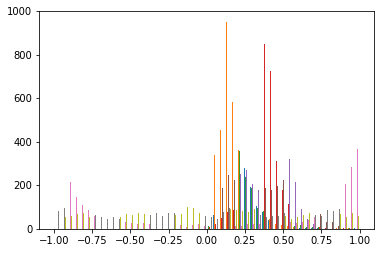

In [ ]:
plt.hist(all_data, bins=50)
plt.show()

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(all_data, all_labels, train_size=0.3, test_size=0.5, random_state=42)

train_data = torch.stack([torch.Tensor(i) for i in train_data])
train_labels = torch.stack([torch.Tensor(i) for i in train_labels])
test_data = torch.stack([torch.Tensor(i) for i in test_data])
test_labels = torch.stack([torch.Tensor(i) for i in test_labels])



train_dataset = utils.TensorDataset(train_data, train_labels)

test_dataset = utils.TensorDataset(test_data, test_labels)

print(train_dataset)

In [ ]:

train_loader = utils.DataLoader(train_dataset)

test_loader = utils.DataLoader(test_dataset)
print(train_loader)

In [ ]:
print(enumerate(train_loader))
for i, e in enumerate(train_loader):
    print(i, e)
    if(i>4):
        break

0 [tensor([[ 0.3239,  0.4726,  0.5254,  0.2889,  0.5906,  0.6293,  0.6913, -0.9937,
         -0.9703]]), tensor([[1., 0.]])]
1 [tensor([[ 0.2442,  0.1496,  0.2398,  0.4023,  0.1998,  0.3372,  0.9316, -0.3328,
         -0.5155]]), tensor([[0., 1.]])]
2 [tensor([[ 0.2227,  0.1374,  0.1940,  0.3974,  0.1896,  0.2406, -0.9624, -0.2967,
          0.3297]]), tensor([[1., 0.]])]
3 [tensor([[ 0.2245,  0.3535,  0.3438,  0.3797,  0.6307,  0.6811, -0.9389, -0.8562,
         -0.5508]]), tensor([[0., 1.]])]
4 [tensor([[ 0.3722,  0.3576,  0.2657,  0.5108,  0.5276,  0.4398, -0.9080, -0.9216,
          0.1880]]), tensor([[0., 1.]])]
5 [tensor([[ 0.2251,  0.3276,  0.3842,  0.4373,  0.5811,  0.7800, -0.9923, -0.9717,
          0.3890]]), tensor([[1., 0.]])]


In [ ]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()                    # Inherited from the parent class nn.Module
        self.fc1 = nn.Linear(input_size, hidden_size)  # 1st Full-Connected Layer: 784 (input data) -> 500 (hidden node)
#         self.relu = nn.Softmax(dim=None)                          # Non-Linear ReLU Layer: max(0,x)
#         self.relu = nn.ReLU()
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes) # 2nd Full-Connected Layer: 500 (hidden node) -> 10 (output class)
        self.pred = torch.Tensor()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):                              # Forward pass: stacking each layer together
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.softmax(out)
        self.pred = out
#         print(out.type)
        return out

In [ ]:
net = Net(input_size, hidden_size, num_classes)


In [ ]:
# net.cuda()    # You can comment out this line to disable GPU

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

In [ ]:
for epoch in range(num_epochs):
    for i, (data, labels) in enumerate(train_loader):   # Load a batch of images with its (index, data, class)
        data = Variable(data)       # Convert torch tensor to Variable: change image from a vector of size 784 to a matrix of 28 x 28
        if(i==0):
            print("DATA SHAPE:", data.shape)
        labels = Variable(labels)
        
        optimizer.zero_grad()                             # Intialize the hidden weight to all zeros
        outputs = net(data)                             # Forward pass: compute the output class given a image
        if(i==0):
            print("OUTPUT SHAPE:", outputs.shape)
        labels = labels.long()
        loss = criterion(outputs, torch.max(labels, 1)[1])                 # Compute the loss: difference between the output class and the pre-given label
        loss.backward()                                   # Backward pass: compute the weight
        optimizer.step()                                  # Optimizer: update the weights of hidden nodes
        
        if (i+1) % 100 == 0:                              # Logging
#             print("SMH")
            print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, len(train_dataset)/batch_size, loss.data.item()))
print(len(train_dataset))

DATA SHAPE: torch.Size([1, 9])
OUTPUT SHAPE: torch.Size([1, 2])
Epoch [1/5], Step [100/10], Loss: 0.8743
Epoch [1/5], Step [200/10], Loss: 1.0201
Epoch [1/5], Step [300/10], Loss: 0.7987
Epoch [1/5], Step [400/10], Loss: 0.8912
Epoch [1/5], Step [500/10], Loss: 0.6585
Epoch [1/5], Step [600/10], Loss: 0.5245
Epoch [1/5], Step [700/10], Loss: 0.6891
Epoch [1/5], Step [800/10], Loss: 0.6888
Epoch [1/5], Step [900/10], Loss: 0.8191
Epoch [1/5], Step [1000/10], Loss: 0.6376
DATA SHAPE: torch.Size([1, 9])
OUTPUT SHAPE: torch.Size([1, 2])
Epoch [2/5], Step [100/10], Loss: 0.9314
Epoch [2/5], Step [200/10], Loss: 0.8961
Epoch [2/5], Step [300/10], Loss: 0.8951
Epoch [2/5], Step [400/10], Loss: 0.8260
Epoch [2/5], Step [500/10], Loss: 0.6392
Epoch [2/5], Step [600/10], Loss: 0.5406
Epoch [2/5], Step [700/10], Loss: 0.7785
Epoch [2/5], Step [800/10], Loss: 0.8376
Epoch [2/5], Step [900/10], Loss: 0.7966
Epoch [2/5], Step [1000/10], Loss: 0.7638
DATA SHAPE: torch.Size([1, 9])
OUTPUT SHAPE: torch

In [ ]:
correct = 0.00
total = 0.00
preds_h = [] # all hh prob
preds_q = [] # all qcd prob
hh_pred = [] # hh prob for hh events
hh_pred_wrong = []
qcd_pred = [] # qcd prob for qcd events
qcd_pred_wrong = []
for data, labels in test_loader:
    data = Variable(data)
    outputs = net(data)
    _, predicted = torch.max(outputs.data, 1)  # Choose the best class from the output: The class with the best score
    
#     np.append(preds, outputs[0].data.numpy())
    preds_h.append(outputs.data[0][0].data)
    preds_q.append(outputs.data[0][1].data)
    if(labels[0][0].data==1): # if higgs
        hh_pred.append(max(outputs.data[0]))
        if(outputs.data[0][0].data<outputs.data[0][1].data):
            hh_pred_wrong.append(outputs.data[0][1].data)
    else:
        qcd_pred.append(max(outputs.data[0]))
        if(outputs.data[0][0].data>outputs.data[0][1].data):
            qcd_pred_wrong.append(outputs.data[0][0].data)

    total += labels.size(0)                    # Increment the total count
    labels = labels.long()
#     print((labels, 1)[1])
    correct += (predicted == torch.max(labels, 1)[1]).sum()     # Increment the correct count
    
print('Accuracy of the network on the 10K test images: %d %%' % (100 * np.float(correct) / np.float(total)))
print("correct:", correct.item())
print("total:", total)      

In [ ]:
print(sum(x < 0 for x in hh_pred).item(), "DiHiggs events with prob less than 0")
print(sum(x > 1 for x in hh_pred).item(), "DiHiggs events with prob greater than 1")
print(sum(y < 0 for y in qcd_pred).item(), "QCD events with prob less than 0")
print(sum(y > 1 for y in qcd_pred).item(), "QCD events with prob greater than 1")

plt.hist(hh_pred, bins=np.linspace(0, 2, 100), alpha=0.375, label="higgs", density=1)
plt.hist(qcd_pred, bins=np.linspace(0, 2, 100), alpha=0.375, label="qcd", density=1)
plt.legend()
plt.title("Event Classification Score for QCD and DiHiggs")
plt.xlabel("Score")
plt.ylabel("Relative Frequency")
plt.show()
plt.clf()


In [ ]:
plt.title("Incorrect event classification score for QCD and DiHiggs")
plt.hist(hh_pred_wrong, bins=np.linspace(0, 2, 100), alpha=0.375, label="higgs", density=1)
plt.hist(qcd_pred_wrong, bins=np.linspace(0, 2, 100), alpha=0.375, label="qcd", density=1)
plt.legend()
plt.show()

plt.clf()

In [ ]:
# my_cmap = plt.cm.jet
# my_cmap.set_under('w',1)

plt.hist2d(preds_h, preds_q, 20, label="Frequency")
plt.xlabel("DiHiggs Probability")
plt.ylabel("QCD Probability")
plt.title("Frequency of QCD vs DiHiggs Probabilities")
plt.show()

In [ ]:
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# #
# # Create an X-Y mesh of the same dimension as the 2D data. You can
# # think of this as the floor of the plot.
# #
# x_data, y_data = np.meshgrid( preds_q,
#                               preds_h )
# #
# # Flatten out the arrays so that they may be passed to "ax.bar3d".
# # Basically, ax.bar3d expects three one-dimensional arrays:
# # x_data, y_data, z_data. The following call boils down to picking
# # one entry from each array and plotting a bar to from
# # (x_data[i], y_data[i], 0) to (x_data[i], y_data[i], z_data[i]).
# #
# x_data = x_data.flatten()
# y_data = y_data.flatten()
# z_data = data_array.flatten()
# ax.bar3d( x_data,
#           y_data,
#           np.zeros(len(z_data)),
#           1, 1, z_data )